### CNN Usado para classificar documentos

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist ## 28x 28 digitos de 0 a 9 escritos a mão
(x_train, y_train), (x_test, y_test) = mnist.load_data()
##normalize the mnist values
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.3225 - acc: 0.9079
Epoch 2/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.1235 - acc: 0.9618
Epoch 3/3
60000/60000 [==============================] - 4s 73us/step - loss: 0.0825 - acc: 0.9743


In [3]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 37us/step
(0.09066766170561313, 0.9726)


In [4]:
model.save('epic_num_reader.model')

In [5]:
import numpy as np
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict([x_test])
print(np.argmax(predictions[0]))

7


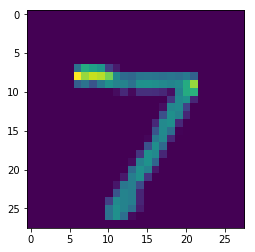

In [6]:
plt.imshow(x_test[0])
#print(x_test[0])

In [34]:
import cv2
img1_0 = cv2.resize(cv2.imread('test_ml/1.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img2_6 = cv2.resize(cv2.imread('test_ml/2.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img3_3 = cv2.resize(cv2.imread('test_ml/3.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img4_6 = cv2.resize(cv2.imread('test_ml/4.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img5_4 = cv2.resize(cv2.imread('test_ml/5.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img6_2 = cv2.resize(cv2.imread('test_ml/6.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img7_1 = cv2.resize(cv2.imread('test_ml/7.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img8_0 = cv2.resize(cv2.imread('test_ml/8.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))

In [35]:
def trataImg(img):
    ret,img_t = cv2.threshold(img,185,255,cv2.THRESH_TOZERO_INV)
    img_t[np.where(img_t == [0])] = [255]
    img_t = cv2.normalize(img_t, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return img_t

In [ ]:
img1_0 = cv2.resize(cv2.imread('test_ml/1.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img2_6 = cv2.resize(cv2.imread('test_ml/2.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img3_3 = cv2.resize(cv2.imread('test_ml/3.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img4_6 = cv2.resize(cv2.imread('test_ml/4.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img5_4 = cv2.resize(cv2.imread('test_ml/5.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img6_2 = cv2.resize(cv2.imread('test_ml/6.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img7_1 = cv2.resize(cv2.imread('test_ml/7.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))
img8_0 = cv2.resize(cv2.imread('test_ml/8.jpg', cv2.IMREAD_GRAYSCALE), (28, 28))

In [36]:
img1_0_t = trataImg(img1_0)
img2_6_t = trataImg(img2_6)
img3_3_t = trataImg(img3_3)
img4_6_t = trataImg(img4_6)
img5_4_t = trataImg(img5_4)
img6_2_t = trataImg(img6_2)
img7_1_t = trataImg(img7_1)
img8_0_t = trataImg(img8_0)

# cv2.imwrite('test_ml/img1_t.jpg', img1_0_t)
# cv2.imwrite('test_ml/img2_t.jpg', img2_6_t)
# cv2.imwrite('test_ml/img3_t.jpg', img3_3_t)
# cv2.imwrite('test_ml/img4_t.jpg', img4_6_t)
# cv2.imwrite('test_ml/img5_t.jpg', img5_4_t)
# cv2.imwrite('test_ml/img6_t.jpg', img6_2_t)
# cv2.imwrite('test_ml/img7_t.jpg', img7_1_t)
# cv2.imwrite('test_ml/img8_t.jpg', img8_0_t)

True

In [37]:
img1_t = cv2.imread('test_ml/img1_t.jpg', cv2.IMREAD_GRAYSCALE)
img2_t = cv2.imread('test_ml/img2_t.jpg', cv2.IMREAD_GRAYSCALE)
img3_t = cv2.imread('test_ml/img3_t.jpg', cv2.IMREAD_GRAYSCALE)
img4_t = cv2.imread('test_ml/img4_t.jpg', cv2.IMREAD_GRAYSCALE)
img5_t = cv2.imread('test_ml/img5_t.jpg', cv2.IMREAD_GRAYSCALE)
img6_t = cv2.imread('test_ml/img6_t.jpg', cv2.IMREAD_GRAYSCALE)
img7_t = cv2.imread('test_ml/img7_t.jpg', cv2.IMREAD_GRAYSCALE)
img8_t = cv2.imread('test_ml/img8_t.jpg', cv2.IMREAD_GRAYSCALE)

img1_t = cv2.normalize(img1_t, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img2_t = cv2.normalize(img2_t, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img3_t = cv2.normalize(img3_t, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img4_t = cv2.normalize(img4_t, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img5_t = cv2.normalize(img5_t, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img6_t = cv2.normalize(img6_t, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img7_t = cv2.normalize(img7_t, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img8_t = cv2.normalize(img8_t, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

x_test_p = [img1_t, img2_t, img3_t, img4_t, img5_t, img6_t, img7_t, img8_t]
y_test = [0, 6, 3, 6, 4, 2, 1, 0]

In [38]:
predictions = new_model.predict([x_test_p])
for i in range(len(predictions)):
    print(np.argmax(predictions[i]), y_test[i])

(0, 0)
(5, 6)
(8, 3)
(4, 6)
(4, 4)
(6, 2)
(4, 1)
(0, 0)


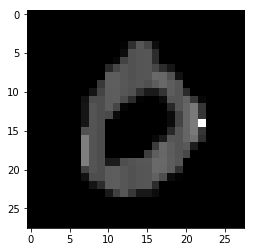

In [39]:
plt.imshow(x_test[3],cmap='gray')